# **Objectives:**
This tutorial aims to cover the following:

1. **Introduction to Mathematical Modelling**
- Descriptive (What) vs. Mechanistic (How) models
- Deterministic vs. Stochastic models
- Temporal vs. Spatiotemporal models

2. **Solving ODEs numerically by odeint**
- Receptor-ligand binding
- Two opposing enzymatic reaction

3. **Solving ODEs by Euler method**

3. **Modelling Chemical Reaction Networks**

4. **Exercises**




# **Receptor-ligand binding**

$Ligand + Receptor \rightarrow Ligand-Receptor$, with a rate constant K1

$Ligand-Receptor \rightarrow Ligand + Receptor$, with a rate constant K2

$\frac{dL}{dt} = -k_1 \ [L] \ [R] + k_2 \ L-R \$

$\frac{dR}{dt} = -k_1 \ [L] \ [R] + k_2 \ L-R \$

$\frac{dL-R}{dt} = k_1 \, [L][R] - k_2 \, L-R$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
k1 = 0.5  # example rate constant for binding
k2 = 0.1  # example rate constant for dissociation

# Define the system of ODEs
def model(y, t, k1, k2):
    L, R, LR = y  # unpack variables for ligand, receptor, and ligand-receptor complex
    # Another way to write it would be L = y[0], R = y[1], and so on...

    # Define the ODEs
    dLdt = -k1 * L * R + k2 * LR
    dRdt = -k1 * L * R + k2 * LR
    dLRdt = k1 * L * R - k2 * LR

    dYdt=np.array([dLdt,dRdt,dLRdt])
    return dYdt

# Initial conditions: concentrations of [L], [R], and [L-R]
L0 = 1.0  # initial concentration of ligand
R0 = 1.0  # initial concentration of receptor
LR0 = 0.0  # initial concentration of ligand-receptor complex

# Time points for simulation
t = np.linspace(0, 50, 100)  # simulate from t=0 to t=50
# That is, 0, 0.5, 1, 1.5, 2, and so on..

# Solve the ODEs
initial_conditions = [L0, R0, LR0]
solution = odeint(model, initial_conditions, t, args=(k1, k2)) # odeint is the solver we'll use.
L, R, LR = solution.T  # Transpose to get each variable separately

In [6]:
print(L) # Notice how L (and R) decreases across time
print(LR) # While LR increases across time

[1.         0.80305894 0.6789962  0.59556889 0.53697641 0.49455943
 0.46317404 0.43957375 0.42161147 0.407814   0.39714065 0.38883886
 0.38235427 0.3772723  0.37327923 0.37013535 0.36765608 0.36569847
 0.3641512  0.3629273  0.36195858 0.36119145 0.36058374 0.36010216
 0.35972043 0.3594178  0.35917784 0.35898755 0.35883663 0.35871693
 0.35862198 0.35854667 0.35848692 0.35843952 0.35840192 0.35837209
 0.35834843 0.35832966 0.35831476 0.35830295 0.35829357 0.35828613
 0.35828023 0.35827555 0.35827183 0.35826889 0.35826655 0.35826469
 0.35826322 0.35826205 0.35826113 0.35826039 0.35825981 0.35825935
 0.35825898 0.35825869 0.35825846 0.35825827 0.35825813 0.35825801
 0.35825792 0.35825785 0.35825779 0.35825775 0.35825771 0.35825768
 0.35825766 0.35825764 0.35825762 0.35825761 0.3582576  0.3582576
 0.35825759 0.35825759 0.35825758 0.35825758 0.35825758 0.35825758
 0.35825758 0.35825757 0.35825757 0.35825757 0.35825757 0.35825757
 0.35825757 0.35825757 0.35825757 0.35825757 0.35825757 0.35825

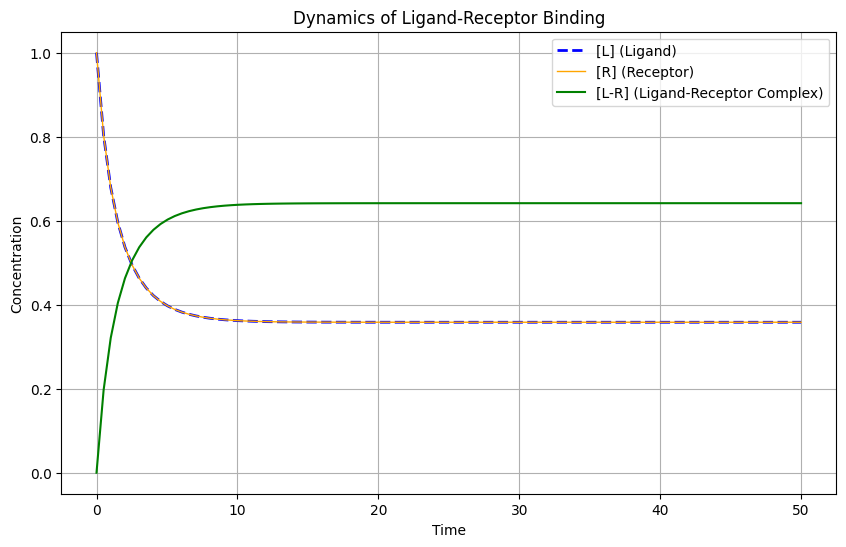

In [10]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, L, label='[L] (Ligand)', color='blue', linestyle='--', linewidth=2)
plt.plot(t, R, label='[R] (Receptor)', color='orange', linestyle='-', linewidth=1)
plt.plot(t, LR, label='[L-R] (Ligand-Receptor Complex)', color='green')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('Dynamics of Ligand-Receptor Binding')
plt.grid()
plt.show()

# **Phosphorylation and dephosphorylation**

$A  \rightarrow pA$, with a rate constant K1 of a kinase

$pA \rightarrow A$, with a rate constant K2 of a phosphatase

$\frac{dA}{dt} = -k_1 \ [A] + k_2 \ pA \$

$\frac{dpA}{dt} = k_1 \ [A] - k_2 \ pA \$

In [11]:
def model(y, t, k1, k2):
    A, pA = y
    dAdt = -k1 * A + k2 * pA
    dpAdt = k1 * A - k2 * pA
    dYdt=np.array([dAdt,dpAdt])
    return dYdt

k1 = 0.1
k2 = 0.001

A0 = 1.0  # initial concentration of dephosphrylated substrate
pA0 = 0.0  # initial concentration of phosphrylated substrate

t = np.linspace(0, 50, 100)

initial_conditions = [A0, pA0]
solution = odeint(model, initial_conditions, t, args=(k1, k2)) # odeint is the solver we'll use.
A, pA = solution.T

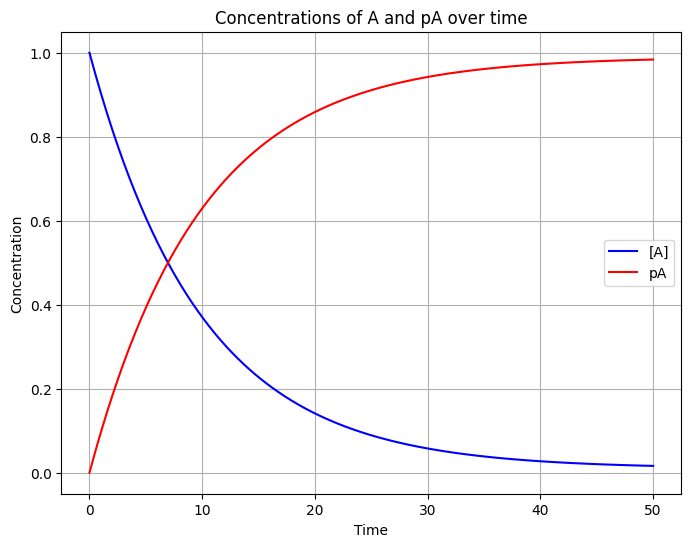

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(t, A, label='[A]', color='blue')  # [A] vs time
plt.plot(t, pA, label='pA', color='red')  # pA vs time
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Concentrations of A and pA over time')
plt.legend()
plt.grid(True)
plt.show()

# **Solving ODEs by Euler method**

***First-order Reaction***

A first order reaction is governed by $A \rightarrow $ and has rate

$\frac{dA}{dt}=-k \, [A]$

where $A$ is the concentration in $mol$, $t$ is time, and $k$ is a rate constant.  The initial concentration is ${A0}$ = 5 $mol$, and $k$ = 1 $\frac{1}{s}$.

An analytic solution (exact) can be obtained by separating and integrating:

**Original:** $\frac{dA}{dt}=-k \, [A]$

**Separate:** $\frac{dA}{A}=-k \, dt$

**Integrate:** $\int_{{A0}}^{A}{\frac{dA}{A}}=\int_0^t{-k \, dt}$

**Solve:** $\ln{\left(A\right)}\vert_{{A0}}^{A} = -k \, t \vert_0^t$

**Limits of Integration:** $\ln{\left(\frac{A}{{A0}}\right)} = -k \, t - (-0)$

**Rearrange for $A(t)$

$Solution:A(t) = {A0} \exp{\left( -k\,t \right)}$

## **First, the analytical solution.**

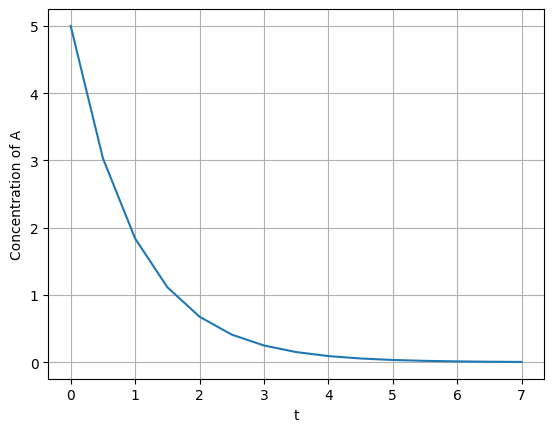

In [54]:
delta_t = 0.5
t_final = 7
n=int(t_final/delta_t)+1
t=np.linspace(0,t_final,n)
A0=5
k=1
A_analytical=A0*np.exp(-k*t)
plt.plot(t,A)
plt.xlabel('t')
plt.ylabel('Concentration of A')
plt.grid(True)
plt.show()

## **Second, the numerical (Euler) solution.**

***Euler:*** Euler's method is a simple numerical technique to calculate the solution of a differential equation. The Euler method evaluates the rate at time $n$ to solve for the next value of $A$ at time $n+1$. The key for Euler's method is to approximate the derivate value as the finite-difference slope between two successive points of $A$.

$\frac{dA}{dt} \approx \frac{{An+1}-{An}}{t_{n+1}-t_n}$

This approximate derivative is substituted into the original differential equation.

$\frac{{An+1}-{An}}{t_{n+1}-t_n} = -k \, {An}$

This equation is then re-arranged to solve for the next concentration ${An+1}$, based on the current concentration ${An}$ and the change in time $t_{n+1}-t_n$.

${An+1} = \left(-k \, {An}\right)\left(t_{n+1}-t_n\right)+{An}$

***Action:*** Use Euler's method to calculate $A$ with an initial condition of 5 $mol$. Use a time step size of $\Delta t$ = 0.5 s and plot to a final time of 7 s (14 steps).

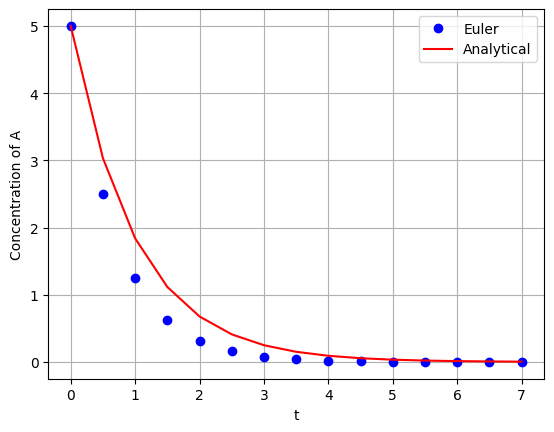

In [53]:
A_euler=np.zeros(n)
A_euler[0]=A0
for i in range(n-1):
    A_euler[i+1]=A_euler[i]+(-k*A_euler[i])*(t[i+1]-t[i])
plt.plot(t,A_euler,'ob',label='Euler')
plt.plot(t,A_analytical,'-r',label='Analytical')
plt.xlabel('t')
plt.ylabel('Concentration of A')
plt.legend()
plt.grid(True)
plt.show()

# **Now let's see a more complicated system!**

We are performing a chemical reaction as follows:

***Reaction 1:*** $A + B \rightarrow C$

***Reaction 2:*** $B + C \rightarrow D$

Product $C$ is desired, but as soon as some $C$ is formed, some $B$ reacts with it to form an undesired product $D$.

The rate of change of the concentrations of each of the species is given by

$\frac{dA}{dt} = -k_1 \, A \, B$

$\frac{dB}{dt} = -k_1 \, A \, B - k_2 \, B \, C$

$\frac{dC}{dt} = k_1 \, A \, B – k_2 \, B \, C$

$\frac{dD}{dt} = k_2 \, B \, C$

The symbols $A$, $B$, $C$, and $D$ are the species concentrations in $mol$.  The initial concentrations are $A_0$=1, $B_0$=1, $C_0$=0, $D_0$=0.  Also, $k_1$ = 1 /mol-s, and $k_2$ = 1.5 /mol-s. Solve for the concentrations of $A$, $B$, $C$, and $D$ as functions of time. Use a time step size of $\Delta t$=0.2 s and solve to a final time of $t$=3 s.

**To tackle this system easily, let's wrap everything inside a function!**

In [104]:
def euler_method(f, x0, t, dt, ks):
    """
    Solves a system of ODEs using the Euler method.

    Parameters:
    f (function): A function that returns the derivatives of the system (dy/dt).
    x0 (array): Initial conditions (values of x at t=0).
    t (array): Time points for integration.
    dt (float): Time step.
    ks (float): Rate constants.

    Returns:
    The solution at each time point.
    """
    n = len(t)  # number of time points
    x = np.zeros((n, len(x0)))
    x[0] = x0  # set initial conditions

    # Apply Euler method for each time step
    for i in range(n - 1):
        x[i + 1] = x[i] + f(x[i], *ks) * dt
    return x

In [93]:
def reaction_system(x, k1, k2):
    '''
    This function defines the dynamics of the biochemical equations
    x is an array including 4 states A,B,C, and D
    ks is an array storing the rate constants
    returns dXdt which is the array containing the values of A,B,C, and D
    '''
    A, B, C, D = x
    dAdt=-k1*A*B
    dBdt=-k1*A*B-k2*B*C
    dCdt=k1*A*B-k2*B*C
    dDdt=k2*B*C
    dXdt=np.array([dAdt,dBdt,dCdt,dDdt])
    return dXdt

In [94]:
def plot_euler(f, x0, ks, t_start, t_end, dt):
    """
    Plots the solution of the ODE using Euler's method.

    Parameters:
    x0 (float): Initial conditions for x.
    k (float): Rate constants for the ODE.
    t_start (float): Start time.
    t_end (float): End time.
    dt (float): Time step.
    """
    t = np.arange(t_start, t_end + dt, dt)

    # Solve the ODE
    solution = euler_method(f, x0, t, dt, ks)

 # Plot the results for each variable
    plt.plot(t, solution[:, 0], label='[A]', color='blue')
    plt.plot(t, solution[:, 1], label='[B]', color='red')
    plt.plot(t, solution[:, 2], label='[C]', color='green')
    plt.plot(t, solution[:, 3], label='[D]', color='purple')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title('Solution of Reaction System using Euler Method')
    plt.legend()
    plt.grid(True)
    plt.show()

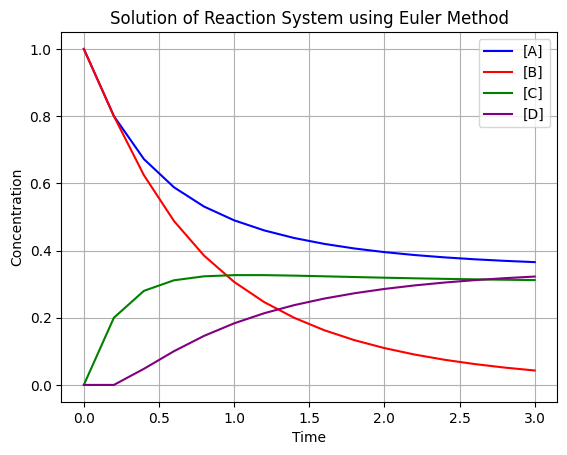

In [95]:
plot_euler(f=reaction_system, x0=[1, 1, 0, 0], ks=[1, 1.5], t_start=0, t_end=3, dt=0.2)

# **Modelling Chemical Reaction Networks**

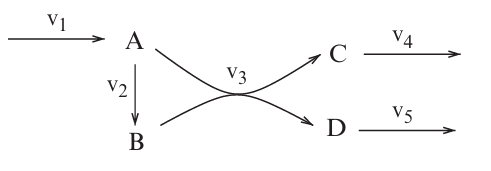

$v1  = k1$

$v2  =  k2 [A]$          

$v3  =  k3 [A][B]$         

$v4  = k4 [C]$          

$v5  = k5 [D]$

$\frac{dA}{dt} = k1 - k2 [A] - k3 [A][B] $

$\frac{dB}{dt} = k2 [A] - k3 [A][B]$

$\frac{dC}{dt} = k3 [A][B] - k4 [C]$

$\frac{dD}{dt} = k3 [A][B] - k5 [D]$

Taking
rate constants of  k1  = 3 mM/s,  k2  = 2/s,  k3  = 2.5/mM/s,  k4  = 3/s, and  k5  = 4/s, the species
concentrations satisfy the following set of differential equations (expressed in
mM/s):

$\frac{dA}{dt} = 3-2a(t)-2.5a(t)b(t)$

$\frac{dB}{dt} = 2a(t)-2.5a(t)b(t)$

$\frac{dC}{dt} = 2.5a(t)b(t)-3c(t)$

$\frac{dD}{dt} = 2.5a(t)b(t)-4d(t)$

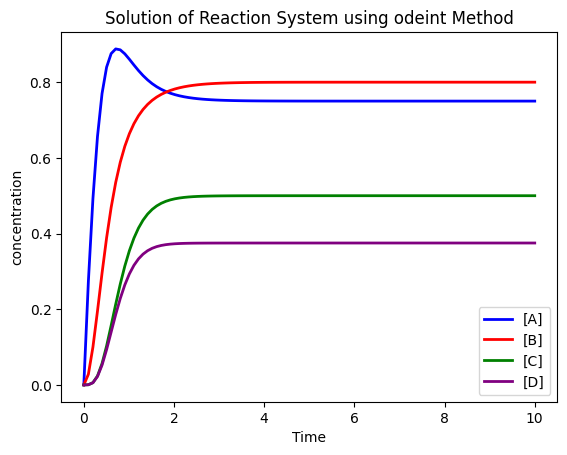

In [110]:
def model_odeint(y, t):
    A, B, C, D = y
    dAdt = 3-2*A-2.5*A*B
    dBdt = 2*A-2.5*A*B
    dCdt = 2.5*A*B-3*C
    dDdt = 2.5*A*B-4*D

    dYdt=np.array([dAdt,dBdt, dCdt, dDdt])
    return dYdt

initial_conditions = [0, 0, 0, 0]

t = np.linspace(0, 10, 100)


solution = odeint(model_odeint, initial_conditions, t)
A, B, C, D = solution.T

plt.figure()
plt.plot(t, A, label="[A]", linewidth=2, color='blue')
plt.plot(t, B, label="[B]", linewidth=2, color='red')
plt.plot(t, C, label="[C]", linewidth=2, color='green')
plt.plot(t, D, label="[D]", linewidth=2, color='purple')
plt.xlabel("Time")
plt.ylabel("concentration")
plt.title('Solution of Reaction System using odeint Method')
plt.legend()
plt.show()

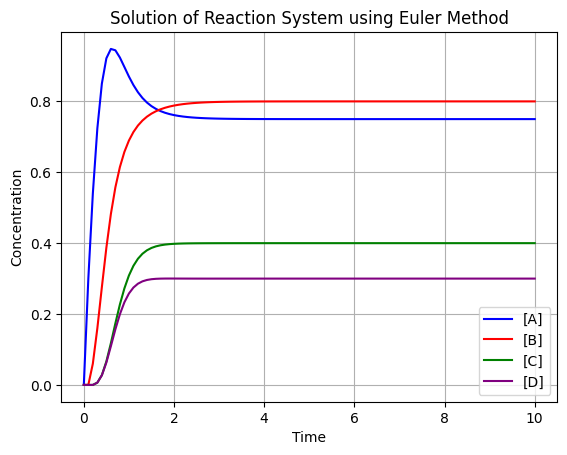

In [107]:
def model_euler(y, k1, k2, k3, k4, k5):
    A, B, C, D = y
    dAdt = k1-k2*A-k3*A*B
    dBdt = k2*A-k3*A*B
    dCdt = k2*A*B-k4*C
    dDdt = k2*A*B-k5*D

    dYdt=np.array([dAdt,dBdt, dCdt, dDdt])
    return dYdt

plot_euler(f=model_euler, x0=[0, 0, 0, 0], ks=[3, 2, 2.5, 3, 4], t_start=0, t_end=10, dt=0.1)

# **Exercises**

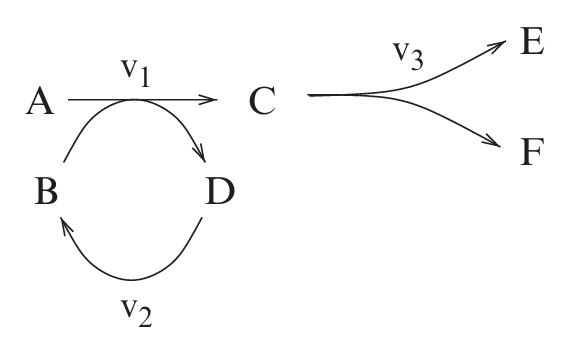

**1. Solve the above chemical reaction network by odeint and Euler method.**

- Take initial conditions (in mM) of ([ A ], [ B ], [ C ], [ D ], [ E ], [ F ]) = (1, 1,  ½ , 0, 0, 0).

- Take rate constants  k1  = 3/mM/s,  k2  = 1/s,  k3  = 4/s.

- Do a simulation of 10 seconds, with a time step of 0.5 second (20 steps).

In [112]:
# Your code